In [1]:
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# we are reading the breast cancer data here
breast_cancer_data = pd.read_csv("C:\\Users\\DELL\\Dropbox\\My PC (DESKTOP-TFDOA36)\\Desktop\\Norah\\T5 Bootcamp\\Project #1\\breast_cancer_data.csv")
breast_cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [2]:
# it shows there is 569 rows and 33 columns
breast_cancer_data.shape

(569, 33)

In [5]:
# to display columns names
breast_cancer_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [3]:
# we donot the columns 'id' and 'unnamed : 32'. So, we are dropping these columns here
breast_cancer_data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [5]:
#here we are counting the total number of enteries in the 'diagnosis' column
total = breast_cancer_data['diagnosis'].count()

# counting the total number of malignant(cancer) patients
malignant = breast_cancer_data[breast_cancer_data['diagnosis'] == "M"]['diagnosis'].count()
print("Malignant: ", malignant)
print("Benign: ", total - malignant)

# Malignant means person having the cancer of breast
# Benign means person is normal, and is not suffering from the breast cancer.

Malignant:  212
Benign:  357


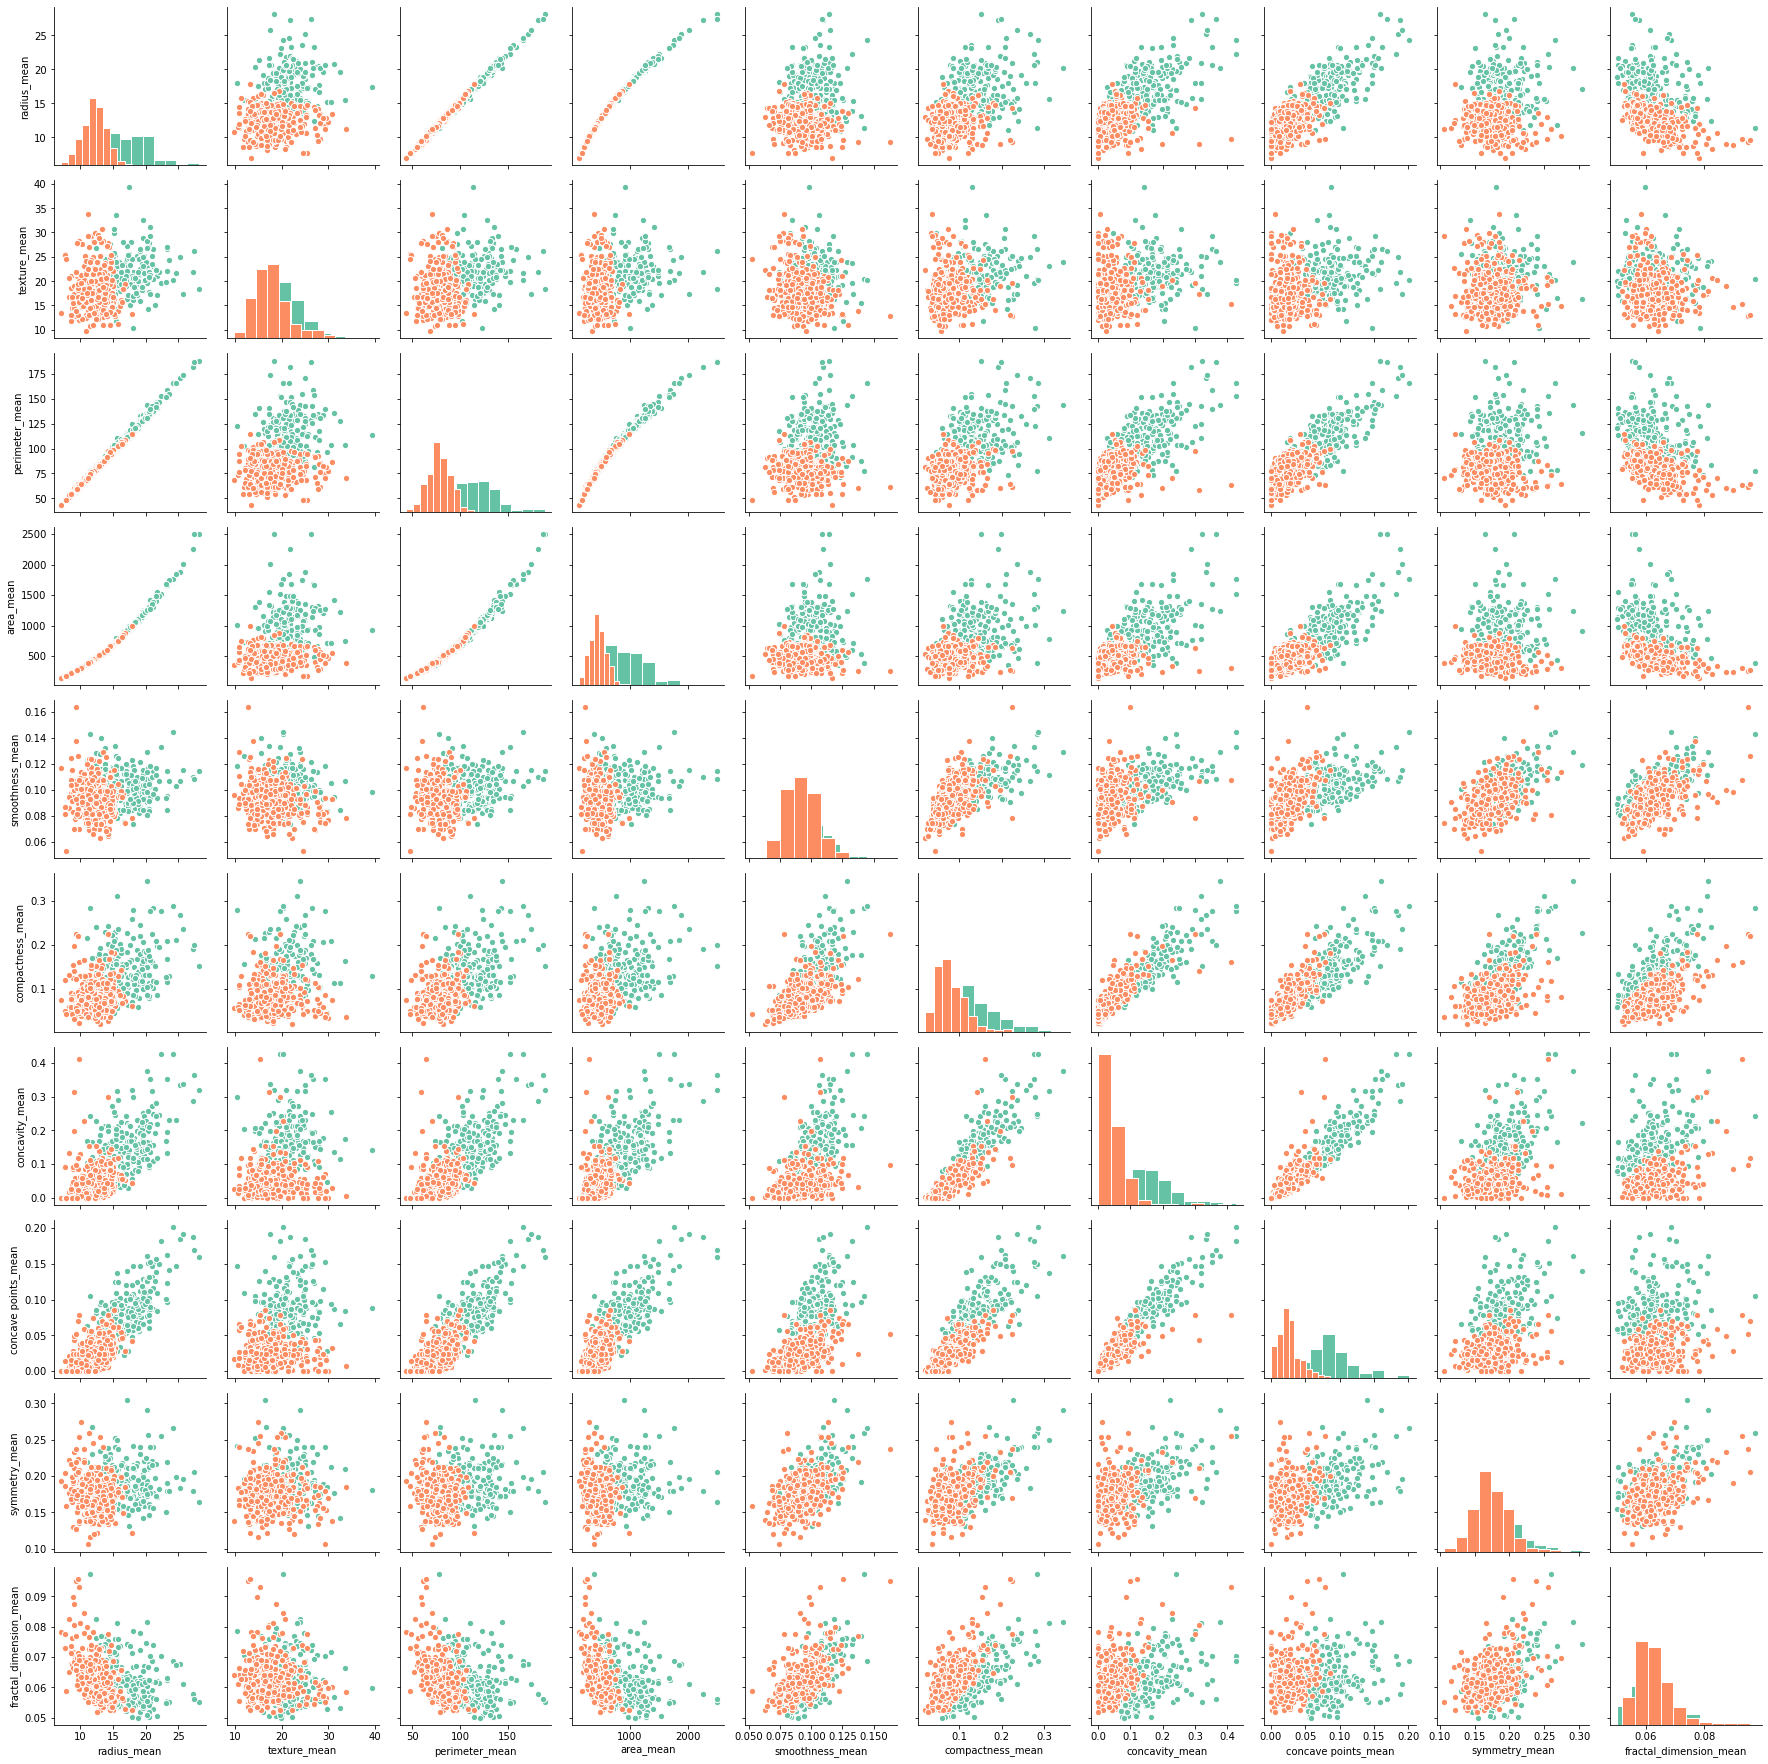

In [6]:
# here we are using 'iloc' of pandas and getting first 11 rows data with their columns and display using seaborn functionality...
g = sns.PairGrid(breast_cancer_data.iloc[:, 0:11], hue="diagnosis", palette="Set2")
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)
plt.show()

In [7]:
# here we converting the 'diagnosis' column values. Malignant = 1 && Benign = 0
breast_cancer_data['diagnosis'] = breast_cancer_data['diagnosis'].map({'M':1,'B':0})
breast_cancer_data['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [8]:
# gettig all the 'diagnosis' column values
array = breast_cancer_data.values

# getting all the features by excluding the first column because we donot need it.
features = array[:,1:]

# Define the target (dependent) variable as labels.
labels = array[:,0]

# here we managing our data.
# Converting our whole data into 70% training && 30% testing
# random_state=42 means randomly picking the data and put it into training and testing.
training_data, testing_data, labels_training_data, labels_testing_data = train_test_split(features,labels,test_size=0.3,random_state=42)
print(training_data.shape, labels_training_data.shape)
print(testing_data.shape, labels_testing_data.shape)

(398, 30) (398,)
(171, 30) (171,)


In [14]:
# we will use K-NN Classifier for the detection of breast cancer here. WE will use builtin KNN instead, of doing the
# code from scratch.

def detecting_breast_cancer():

    # WE are developing our KNeighbours classifier here.
    model = KNeighborsClassifier()

    # Applying our model on the traing data and training labels. (WE ARE TRAINING OUR MODEL HERE)
    model.fit(training_data, labels_training_data)

    # Providing testing data to the model to make predictions whether the pateint is Malignant or Benign
    predictions = model.predict(testing_data)
    print("Labels to be predicted :\n")
    TL = list()
    for i in range(len(labels_testing_data)):
        if labels_testing_data[i] == 1:
            TL.append('Cancer')
        else:
            TL.append('No cancer')
    print(TL)
    PL = []
    print("\n Predicted Labels :\n")
    for i in range(len(predictions)):
        if predictions[i] == 1:
            PL.append('Cancer')
        else:
            PL.append('No cancer')
    print(PL)
    # Checking the performance of the model where it predicts the result correctly
    model_accuracy = model.score(testing_data, labels_testing_data)
    report = classification_report(labels_testing_data, predictions)
    
    # Print the reports.
    #print(f"\nThe training score : {model.score(training_data, labels_training_data)}%")
    print("\nFinal Report:\n")
    print(f"Accuracy of the model : {model_accuracy*100}%")
    print("\n", report)

detecting_breast_cancer()
# 1 represents Malignant means having cancer
# 0 represents Benign means not having cancer

Labels to be predicted :

['No cancer', 'Cancer', 'Cancer', 'No cancer', 'No cancer', 'Cancer', 'Cancer', 'Cancer', 'No cancer', 'No cancer', 'No cancer', 'Cancer', 'No cancer', 'Cancer', 'No cancer', 'Cancer', 'No cancer', 'No cancer', 'No cancer', 'Cancer', 'Cancer', 'No cancer', 'Cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'Cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'Cancer', 'No cancer', 'Cancer', 'No cancer', 'No cancer', 'Cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'Cancer', 'Cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'No cancer', 'Cancer', 'Cancer', 'No cancer', 'No cancer', 'Cancer', 'Cancer', 'No cancer', 'No cancer', 'No cancer', 'Cancer', 'Cancer', 'No cancer', 'No cancer', 'Cancer', 'Cancer', 'No cancer', 'Cancer', 'No cancer', 'No cancer', 'No cancer', 'Cancer', 'No cancer', 'No cancer', 'Cancer', 'No 